# Class4: 网络八股扩展

## Prerequisites

### Setup virtul environment

- `python3.6.9` + `TensorFlow2.3.0` + `sklearn` + `pandas` + `matplotlib`

## 4.1 搭建网络八股总览
- 自制数据集，解决本领域应用 
  - 将自己本领域的数据和标签**赋值**给`x_train`, `y_train`, `x_test`, `y_test`
- 数据增强，扩充数据集
  - **数据增强**的代码: 数据量过少
- 断点续训，存取模型
  - **断点续训**的代码, **实时保存**最优模型, 从而无需总是从零开始训练模型
- **参数提取**的代码, 将参数存入文本
- **acc/loss曲线**绘制的代码, **可视化**训练效果
- **应用程序**, 给图识物

## 4.2 自制数据集
- 替代TensorFlow中自带函数`.load_data()`

### upload the mnist_image_label.zip to sample_data
- unzip the mnist_image_label.zip

In [8]:
import zipfile
with zipfile.ZipFile("/content/sample_data/mnist_image_label.zip", 'r') as zip_ref:
    zip_ref.extractall("/content/sample_data/mnist_image_label")

In [9]:
rm -rf /content/sample_data/mnist_image_label/__MACOSX

### rename folder of mnist_image_label with test

In [10]:
mv /content/sample_data/mnist_image_label /content/sample_data/test   

In [11]:
# p8_mnist_train_ex1.py

import tensorflow as tf
from PIL import Image
import numpy as np
import os

train_path = '/content/sample_data/test/mnist_image_label/mnist_train_jpg_60000/'
train_txt = '/content/sample_data/test/mnist_image_label/mnist_train_jpg_60000.txt'
x_train_savepath = '/content/sample_data/test/mnist_image_label/mnist_x_train.npy'
y_train_savepath = '/content/sample_data/test/mnist_image_label/mnist_y_train.npy'

test_path = '/content/sample_data/test/mnist_image_label/mnist_test_jpg_10000/'
test_txt = '/content/sample_data/test/mnist_image_label/mnist_test_jpg_10000.txt'
x_test_savepath = '/content/sample_data/test/mnist_image_label/mnist_x_test.npy'
y_test_savepath = '/content/sample_data/test/mnist_image_label/mnist_y_test.npy'


def generateds(path, txt):
    f = open(txt, 'r')  # 以只读形式打开txt文件
    contents = f.readlines()  # 读取文件中所有行
    f.close()  # 关闭txt文件
    x, y_ = [], []  # 建立空列表
    for content in contents:  # 逐行取出
        value = content.split()  # 以空格分开，图片路径为value[0] , 标签为value[1] , 存入列表
        img_path = path + value[0]  # 拼出图片路径和文件名
        img = Image.open(img_path)  # 读入图片
        img = np.array(img.convert('L'))  # 图片变为8位宽灰度值的np.array格式
        img = img / 255.  # 数据归一化 （实现预处理）
        x.append(img)  # 归一化后的数据，贴到列表x
        y_.append(value[1])  # 标签贴到列表y_
        print('loading : ' + content)  # 打印状态提示

    x = np.array(x)  # 变为np.array格式
    y_ = np.array(y_)  # 变为np.array格式
    y_ = y_.astype(np.int64)  # 变为64位整型
    return x, y_  # 返回输入特征x，返回标签y_


if os.path.exists(x_train_savepath) and os.path.exists(y_train_savepath) and os.path.exists(
        x_test_savepath) and os.path.exists(y_test_savepath):
    print('-------------Load Datasets-----------------')
    x_train_save = np.load(x_train_savepath)
    y_train = np.load(y_train_savepath)
    x_test_save = np.load(x_test_savepath)
    y_test = np.load(y_test_savepath)
    x_train = np.reshape(x_train_save, (len(x_train_save), 28, 28))
    x_test = np.reshape(x_test_save, (len(x_test_save), 28, 28))
else:
    print('-------------Generate Datasets-----------------')
    x_train, y_train = generateds(train_path, train_txt)
    x_test, y_test = generateds(test_path, test_txt)

    print('-------------Save Datasets-----------------')
    x_train_save = np.reshape(x_train, (len(x_train), -1))
    x_test_save = np.reshape(x_test, (len(x_test), -1))
    np.save(x_train_savepath, x_train_save)
    np.save(y_train_savepath, y_train)
    np.save(x_test_savepath, x_test_save)
    np.save(y_test_savepath, y_test)

model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['sparse_categorical_accuracy'])

model.fit(x_train, y_train, batch_size=32, epochs=5, validation_data=(x_test, y_test), validation_freq=1)
model.summary()

Streaming output truncated to the last 5000 lines.

loading : 3741_1.jpg 1

loading : 2732_6.jpg 6

loading : 1389_8.jpg 8

loading : 3881_9.jpg 9

loading : 7925_6.jpg 6

loading : 2865_3.jpg 3

loading : 1599_4.jpg 4

loading : 1852_6.jpg 6

loading : 1666_9.jpg 9

loading : 7616_9.jpg 9

loading : 363_2.jpg 2

loading : 9920_8.jpg 8

loading : 7463_1.jpg 1

loading : 7145_7.jpg 7

loading : 1934_1.jpg 1

loading : 3795_3.jpg 3

loading : 8065_8.jpg 8

loading : 3791_9.jpg 9

loading : 9050_6.jpg 6

loading : 4359_5.jpg 5

loading : 5784_9.jpg 9

loading : 9099_4.jpg 4

loading : 8936_2.jpg 2

loading : 2701_4.jpg 4

loading : 11_6.jpg 6

loading : 4701_9.jpg 9

loading : 1996_6.jpg 6

loading : 7695_7.jpg 7

loading : 8723_9.jpg 9

loading : 7926_8.jpg 8

loading : 2424_3.jpg 3

loading : 592_0.jpg 0

loading : 9176_5.jpg 5

loading : 9549_1.jpg 1

loading : 5742_5.jpg 5

loading : 8107_4.jpg 4

loading : 2948_5.jpg 5

loading : 9729_5.jpg 5

loading : 8304_7.jpg 7

loading : 6452_7

## 4.3 数据增强
- TensorFlow中的数据增强函数
  - `tf.keras.preprocessing.image.ImageDataGenerator`
  - 调整函数中的参数
    - rescale= 所有数据将乘以该数值
    - rotation_range= 随机旋转角度数范围
    - width_shift_range=  随机宽度偏移量
    - height_shift_range= 随机高度偏移量
    - horizontal_flip= 是否随机水平翻转
    - zoom_range= 随机缩放的范围[1-n，1+n] 

11493376/11490434 [==============================] - 0s 0us/step
xtrain (60000, 28, 28, 1)
xtrain_subset1 (12, 28, 28)
xtrain (60000, 28, 28, 1)
xtrain_subset2 (12, 28, 28, 1)


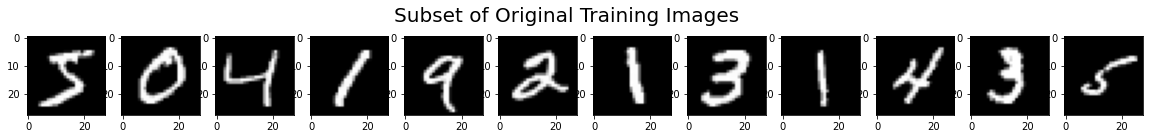

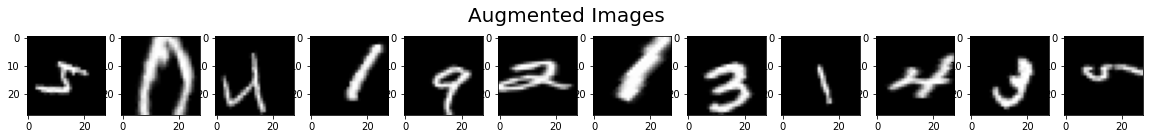

In [1]:
# p11_show_augmented _images.py

# 显示原始图像和增强后的图像
import tensorflow as tf
from matplotlib import pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)

image_gen_train = ImageDataGenerator(
    rescale=1. / 255,   # 所有数据将乘以该数值
    rotation_range=45,    # 随机旋转角度数范围
    width_shift_range=.15,  # 随机宽度偏移量
    height_shift_range=.15,   # 随机高度偏移量
    horizontal_flip=False,    # 不进行随机水平翻转
    zoom_range=0.5    # 随机缩放(范围可选区间[1-n，1+n])
)
image_gen_train.fit(x_train)    # x_train 送入数据增强操作
print("xtrain",x_train.shape)
x_train_subset1 = np.squeeze(x_train[:12])
print("xtrain_subset1",x_train_subset1.shape)
print("xtrain",x_train.shape)
x_train_subset2 = x_train[:12]  # 一次显示12张图片
print("xtrain_subset2",x_train_subset2.shape)

fig = plt.figure(figsize=(20, 2))
plt.set_cmap('gray')
# 显示原始图片
for i in range(0, len(x_train_subset1)):
    ax = fig.add_subplot(1, 12, i + 1)
    ax.imshow(x_train_subset1[i])
fig.suptitle('Subset of Original Training Images', fontsize=20)
plt.show()

# 显示增强后的图片
fig = plt.figure(figsize=(20, 2))
for x_batch in image_gen_train.flow(x_train_subset2, batch_size=12, shuffle=False):
    for i in range(0, 12):
        ax = fig.add_subplot(1, 12, i + 1)
        ax.imshow(np.squeeze(x_batch[i]))
    fig.suptitle('Augmented Images', fontsize=20)
    plt.show()
    break;

In [3]:
# p13_mnist_train_ex2.py

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)  # 给数据增加一个维度,使数据和网络结构匹配. eg, 从(60000, 28, 28)reshape为(60000, 28, 28, 1)

# -----------开始数据增强--------------------------------------------
image_gen_train = ImageDataGenerator(
    rescale=1. / 1.,  # 如为图像，分母为255时，可归至0～1
    rotation_range=45,  # 随机45度旋转
    width_shift_range=.15,  # 宽度偏移
    height_shift_range=.15,  # 高度偏移
    horizontal_flip=False,  # 水平翻转
    zoom_range=0.5  # 将图像随机缩放阈量50％
)
image_gen_train.fit(x_train)    # x_train 送入数据增强操作中
# ----------数据增强结束--------------------------------------------

model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['sparse_categorical_accuracy'])

model.fit(image_gen_train.flow(x_train, y_train, batch_size=32), epochs=5, validation_data=(x_test, y_test),
          validation_freq=1)
model.summary()

Epoch 1/5
1875/1875 [==============================] - 19s 10ms/step - loss: 1.4168 - sparse_categorical_accuracy: 0.5412 - val_loss: 0.4516 - val_sparse_categorical_accuracy: 0.8861
Epoch 2/5
1875/1875 [==============================] - 19s 10ms/step - loss: 0.9557 - sparse_categorical_accuracy: 0.7088 - val_loss: 0.3495 - val_sparse_categorical_accuracy: 0.9065
Epoch 3/5
1875/1875 [==============================] - 19s 10ms/step - loss: 0.8282 - sparse_categorical_accuracy: 0.7486 - val_loss: 0.2865 - val_sparse_categorical_accuracy: 0.9211
Epoch 4/5
1875/1875 [==============================] - 19s 10ms/step - loss: 0.7617 - sparse_categorical_accuracy: 0.7708 - val_loss: 0.2368 - val_sparse_categorical_accuracy: 0.9318
Epoch 5/5
1875/1875 [==============================] - 19s 10ms/step - loss: 0.7169 - sparse_categorical_accuracy: 0.7846 - val_loss: 0.2436 - val_sparse_categorical_accuracy: 0.9269
Model: "sequential_1"
_______________________________________________________________

## 4.4 断点续训
- 读取模型
  - TensorFlow中函数`model.load_weights(路径文件名)`,读取已有模型参数
- 保存模型
  - `cp_callback=tf.keras.callbacks.ModelCheckpoint()`
- 继续从上次模型训练结果进行
- 生成的**checkpoint** 文件夹中存放的就是模型参数

In [34]:
# p16_mnist_train_ex3.py

import tensorflow as tf
import os

mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['sparse_categorical_accuracy'])

# ---------------------------断点续训检查--------------------------------------------
checkpoint_save_path = "/content/sample_data/checkpoint/mnist.ckpt"      # 先定义存放模型的路径和文件名.ckpt
if os.path.exists(checkpoint_save_path + '.index'):   # .ckpt文件会同步生成.index文件索引, 判断索引即可知道模型参数文件存在与否    
    print('-------------load the model-----------------')
    model.load_weights(checkpoint_save_path)

cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_save_path,
                                                 save_weights_only=True,  # true or false
                                                 save_best_only=True)   # true or false
# ---------------------------断点续训结束---------------------------------------------

history = model.fit(x_train, y_train, batch_size=32, epochs=5, validation_data=(x_test, y_test), validation_freq=1,
                    callbacks=[cp_callback])
model.summary()

-------------load the model-----------------
Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0359 - sparse_categorical_accuracy: 0.9886 - val_loss: 0.0795 - val_sparse_categorical_accuracy: 0.9776
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0287 - sparse_categorical_accuracy: 0.9910 - val_loss: 0.0788 - val_sparse_categorical_accuracy: 0.9761
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0237 - sparse_categorical_accuracy: 0.9928 - val_loss: 0.0840 - val_sparse_categorical_accuracy: 0.9748
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0194 - sparse_categorical_accuracy: 0.9936 - val_loss: 0.0857 - val_sparse_categorical_accuracy: 0.9782
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0155 - sparse_categorical_accuracy: 0.9952 - val_loss: 0.0820 - val_sparse_categorical_accuracy: 0.9794
Model: "sequential_20"
___________________________

## 4.5 参数提取
- 提取可训练参数
  - `model.trainable_variables` 返回模型中可训练的参数
- 设置print输出格式
  - `np.set_printoptions(threshold=超过多少省略显示)`
    - threshold=np.inf表示无限大
  - `for loop`将所有可训练参数存入文本文件中

In [36]:
# p19_mnist_train_ex4.py

import tensorflow as tf
import os
import numpy as np
np.set_printoptions(threshold=np.inf)   # 设置无限打印
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['sparse_categorical_accuracy'])

checkpoint_save_path = "/content/sample_data/checkpoint/mnist.ckpt"
if os.path.exists(checkpoint_save_path + '.index'):
    print('-------------load the model-----------------')
    model.load_weights(checkpoint_save_path)
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_save_path,
                                                 save_weights_only=True,
                                                 save_best_only=True)

history = model.fit(x_train, y_train, batch_size=32, epochs=5, validation_data=(x_test, y_test), validation_freq=1,
                    callbacks=[cp_callback])

model.summary()

# 打印并存入.txt文件
print(model.trainable_variables)
file = open('/content/sample_data/test/weights.txt', 'w')
for v in model.trainable_variables:
    file.write(str(v.name) + '\n')
    file.write(str(v.shape) + '\n')
    file.write(str(v.numpy()) + '\n')
file.close()

Streaming output truncated to the last 5000 lines.
         3.81114513e-01, -3.94015104e-01,  1.39283821e-01,
         2.11181998e-01,  2.47719854e-01, -4.18626405e-02,
         3.61268595e-02, -1.74389377e-01, -2.87279308e-01,
         4.44261074e-01, -5.66421330e-01,  2.38213882e-01,
        -4.66305077e-01, -4.15800847e-02, -4.14310843e-01,
         3.78696471e-01, -4.12783585e-03, -1.56736284e-01,
         4.09310162e-02, -5.07303067e-02,  3.42232913e-01,
        -1.15422130e-01,  1.93306687e-03,  1.56880856e-01,
         3.73916775e-01,  4.23501730e-01,  3.16858478e-02,
        -1.91779301e-01, -3.81877363e-01, -2.93354452e-01,
        -6.74718395e-02, -3.57310735e-02,  2.27041811e-01,
         1.68396682e-01, -3.05413485e-01, -2.54920661e-01,
        -1.08051402e-02, -4.09587622e-02, -2.46175602e-01,
        -2.60788292e-01,  1.69611096e-01,  2.72967778e-02,
         3.81118357e-01, -2.68824529e-02, -2.06353068e-01,
         6.54236197e-01, -9.41395387e-02,  8.23853388e-02,
     

## 4.6 acc&loss可视化
- history:
  - 训练集loss: loss
  - 测试集loss: val_loss
  - 训练集准确率: sparse_categorical_accuracy 
  - 测试集准确率: val_sparse_categorical_accuracy
- `history.history`从`model.fit`中提取
  ```
  acc = history.history['sparse_categorical_accuracy']
  val_acc = history.history['val_sparse_categorical_accuracy']
  loss = history.history['loss']
  val_loss = history.history['val_loss']
  ```



Streaming output truncated to the last 5000 lines.
         4.72270325e-02, -1.59110855e-02,  5.31888269e-02,
        -5.67725040e-02,  4.59023565e-02, -9.92816221e-03,
         8.72659031e-03,  1.09166369e-01, -2.66952693e-01,
         1.91002265e-02, -1.84772670e-01,  1.42989531e-01,
         6.82407767e-02,  1.43035933e-01, -9.04475674e-02,
        -2.33403090e-02, -2.17080489e-02, -1.09261170e-01,
         1.11506321e-01,  1.59309208e-02, -1.30584091e-01,
        -4.04213788e-03,  1.05611995e-01,  9.96605381e-02,
         1.45794554e-02, -2.50170585e-02, -5.71414791e-02,
        -3.07546675e-01,  1.62572786e-01,  1.28293559e-01,
        -5.32047510e-01, -1.17811747e-01, -2.91904621e-02,
         1.27369501e-02,  1.89221710e-01, -1.29009813e-01,
        -2.63354748e-01,  2.98409164e-01,  3.68495405e-01,
         1.01002514e-01,  5.36137298e-02,  5.42323198e-03,
        -1.03446757e-02,  6.00806624e-02, -2.05271602e-01,
         4.36112508e-02,  6.89301267e-02,  1.15906864e-01,
     

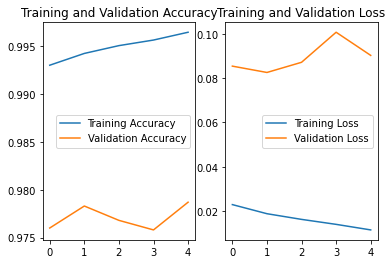

In [37]:
# p23_mnist_train_ex5.py

import tensorflow as tf
import os
import numpy as np
from matplotlib import pyplot as plt

np.set_printoptions(threshold=np.inf)

mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['sparse_categorical_accuracy'])

checkpoint_save_path = "/content/sample_data/checkpoint/mnist.ckpt"
if os.path.exists(checkpoint_save_path + '.index'):
    print('-------------load the model-----------------')
    model.load_weights(checkpoint_save_path)

cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_save_path,
                                                 save_weights_only=True,
                                                 save_best_only=True)

history = model.fit(x_train, y_train, batch_size=32, epochs=5, validation_data=(x_test, y_test), validation_freq=1,
                    callbacks=[cp_callback])
model.summary()

print(model.trainable_variables)
file = open('/content/sample_data/test/weights.txt', 'w')
for v in model.trainable_variables:
    file.write(str(v.name) + '\n')
    file.write(str(v.shape) + '\n')
    file.write(str(v.numpy()) + '\n')
file.close()

###############################################    show   ###############################################

# 显示训练集和验证集的acc和loss曲线
acc = history.history['sparse_categorical_accuracy']
val_acc = history.history['val_sparse_categorical_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.subplot(1, 2, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

## 4.7 给图识物
- 输入一张手写数字图片, 神经网络自动识别出值, 输出识别结果
- 复现模型, 即, 前向传播执行应用
  - `model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'), 
    tf.keras.layers.Dense(10, activation='softmax’)])`

- 加载参数
  - `model.load_weights(model_save_path)`

- 预测结果, 即, 返回前向传播计算结果
  - `result = model.predict(x_predict)`


In [15]:
import zipfile
with zipfile.ZipFile("/content/checkpoint/checkpoint.zip", 'r') as zip_ref:
    zip_ref.extractall("/content/checkpoint/test")

In [16]:
rm -rf /content/checkpoint/test/__MACOSX/

In [53]:
# p27_mnist_app.py

from PIL import Image
import numpy as np
import tensorflow as tf
import os

model_save_path = '/content/sample_data/checkpoint/mnist.ckpt'

model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')])
    
model.load_weights(model_save_path)

preNum = int(input("input the number of test pictures:"))

for i in range(preNum):
    # image_path = input("the path of test picture:")
    image_path = os.path.join('/content/sample_data/test/', str(i)+".png")
    img = Image.open(image_path)
    img = img.resize((28, 28), Image.ANTIALIAS)
    img_arr = np.array(img.convert('L'))

    img_arr = 255 - img_arr
                
    img_arr = img_arr / 255.0
    print("img_arr:",img_arr.shape)
    x_predict = img_arr[tf.newaxis, ...]
    print("x_predict:",x_predict.shape)
    result = model.predict(x_predict)
    
    pred = tf.argmax(result, axis=1)
    
    print('\n')
    tf.print(pred)

input the number of test pictures:10
img_arr: (28, 28)
x_predict: (1, 28, 28)


[0]
img_arr: (28, 28)
x_predict: (1, 28, 28)


[8]
img_arr: (28, 28)
x_predict: (1, 28, 28)


[2]
img_arr: (28, 28)
x_predict: (1, 28, 28)


[3]
img_arr: (28, 28)
x_predict: (1, 28, 28)


[6]
img_arr: (28, 28)
x_predict: (1, 28, 28)


[3]
img_arr: (28, 28)
x_predict: (1, 28, 28)


[2]
img_arr: (28, 28)
x_predict: (1, 28, 28)


[7]
img_arr: (28, 28)
x_predict: (1, 28, 28)


[8]
img_arr: (28, 28)
x_predict: (1, 28, 28)


[8]


input the number of test pictures:10


[0]


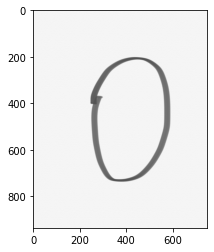



[1]


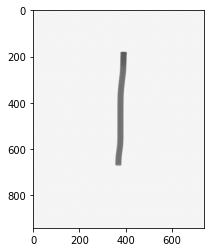



[2]


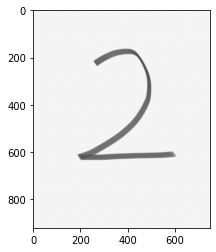



[3]


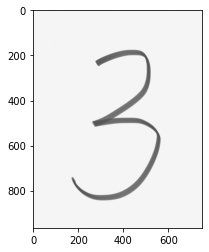



[4]


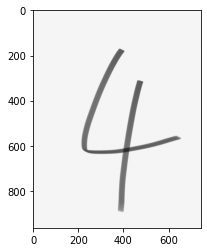



[3]


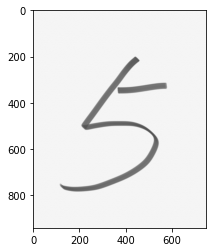



[6]


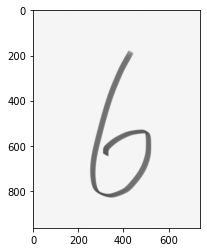



[7]


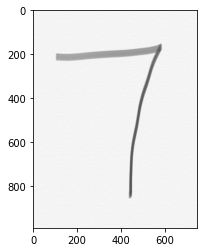



[8]


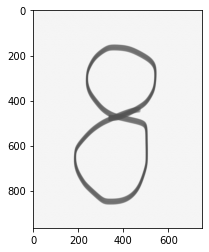



[9]


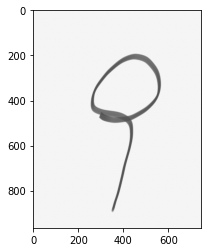

In [52]:
# p28_mnist_app_ex.py

import os
from PIL import Image
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

model_save_path = '/content/sample_data/checkpoint/mnist.ckpt'
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.load_weights(model_save_path)
preNum = int(input("input the number of test pictures:"))

for i in range(preNum):
    # image_name = input("the number of test picture:")    
    image_path = os.path.join('/content/sample_data/test/', str(i)+".png")
    img = Image.open(image_path)

    image = plt.imread(image_path)
    plt.set_cmap('gray')
    plt.imshow(image)

    img = img.resize((28, 28), Image.ANTIALIAS)
    img_arr = np.array(img.convert('L'))

    for i in range(28):
        for j in range(28):
            if img_arr[i][j] < 200:
                img_arr[i][j] = 255
            else:
                img_arr[i][j] = 0

    img_arr = img_arr / 255.0
    x_predict = img_arr[tf.newaxis, ...]
    result = model.predict(x_predict)
    pred = tf.argmax(result, axis=1)

    print('\n')
    tf.print(pred)

    plt.pause(1)
    plt.close()